In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
dataset = pd.read_csv("iris_100_rows.csv")
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,4.9,4.3,1.7,0.4,setosa
1,4.5,2.6,1.1,0.5,setosa
2,5.2,3.8,1.0,0.6,setosa
3,5.5,2.7,1.2,0.2,setosa
4,4.8,3.4,1.4,0.2,setosa


In [14]:
dataset["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

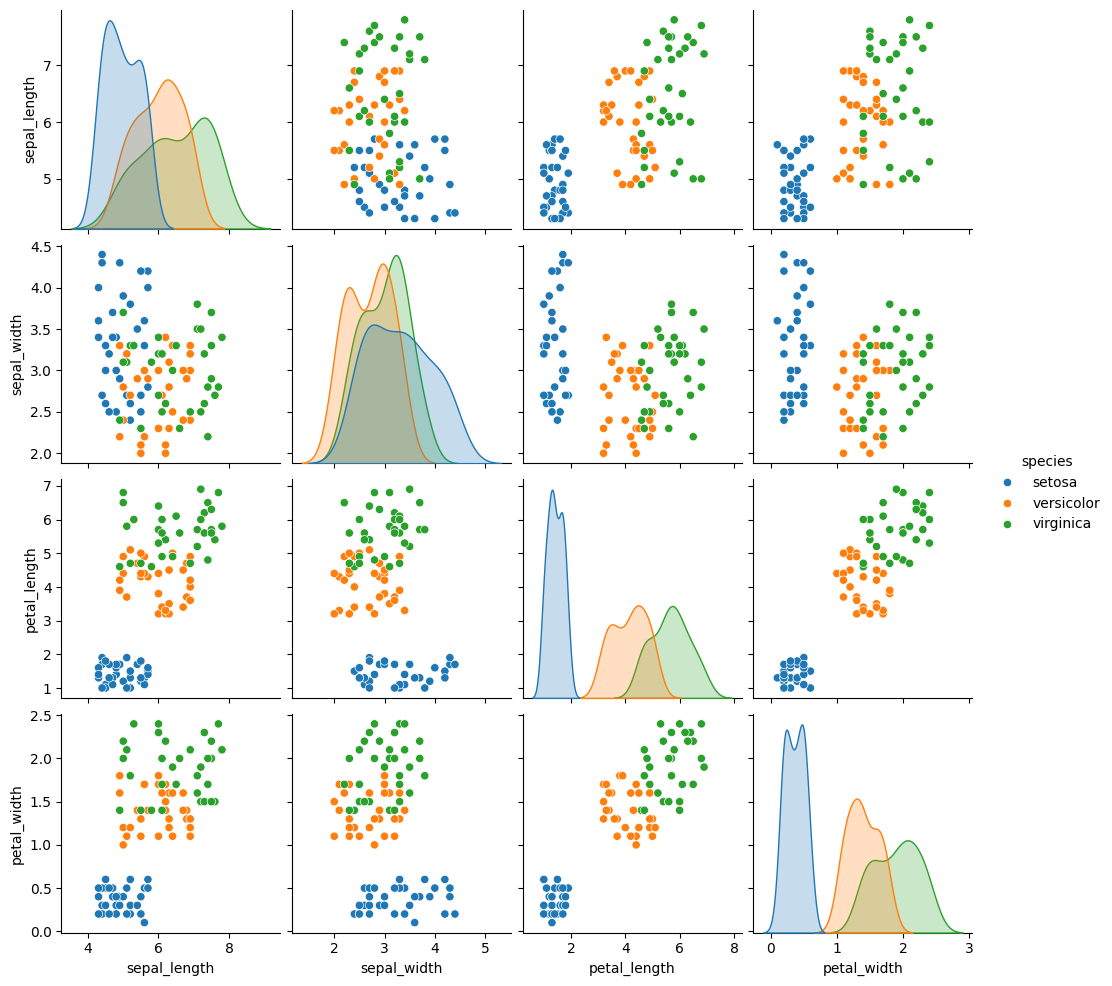

In [16]:
sns.pairplot(data=dataset, hue = "species")
plt.show()

In [17]:
x = dataset.iloc[:,:-1]
y = dataset["species"]

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)


In [20]:
lr1 = LogisticRegression(solver="lbfgs")
lr1.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [21]:
lr1.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [22]:
lr1.score(x_test, y_test)*100

95.0

In [23]:
lr1.score(x_test, y_test)*100

95.0

What is a Confusion Matrix?

A Confusion Matrix is a table used to evaluate the performance of a classification model.
It shows how many predictions were correct and how many were wrong, class-wise.

In short:
👉 It compares Actual values vs Predicted values.

Basic 2×2 Confusion Matrix
	Predicted: Positive	Predicted: Negative
Actual: Positive	True Positive (TP)	False Negative (FN)
Actual: Negative	False Positive (FP)	True Negative (TN)
Explanation of Each Term (Very Important)
1️⃣ True Positive (TP)

Model predicts Positive

Actual value is also Positive

✅ Correct prediction

📌 Example (Crime Prediction):
High crime area predicted as High crime

2️⃣ True Negative (TN)

Model predicts Negative

Actual value is also Negative

✅ Correct prediction

📌 Example:
Low crime area predicted as Low crime

3️⃣ False Positive (FP) – Type I Error

Model predicts Positive

Actual value is Negative

❌ Wrong prediction

📌 Example:
Low crime area predicted as High crime

4️⃣ False Negative (FN) – Type II Error

Model predicts Negative

Actual value is Positive

❌ Wrong prediction

📌 Example:
High crime area predicted as Low crime

⚠️ This is dangerous in crime prediction because real crime may be ignored.

Why is it called “Confusion” Matrix?

Because it clearly shows where the model is confused:

FP → False alarm

FN → Missed detection

Metrics Derived from Confusion Matrix
🔹 Accuracy

How many predictions were correct?

𝐴
𝑐
𝑐
𝑢
𝑟
𝑎
𝑐
𝑦
=
𝑇
𝑃
+
𝑇
𝑁
𝑇
𝑃
+
𝑇
𝑁
+
𝐹
𝑃
+
𝐹
𝑁
Accuracy=
TP+TN+FP+FN
TP+TN
	​

🔹 Precision

Out of predicted positives, how many were actually positive?

𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
Precision=
TP+FP
TP
	​


📌 Important when false alarms are costly

🔹 Recall (Sensitivity)

Out of actual positives, how many were correctly predicted?

𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
Recall=
TP+FN
TP
	​


📌 Important when missing a positive case is dangerous

🔹 F1-Score

Balance between Precision and Recall

𝐹
1
=
2
×
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
×
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
+
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
F1=
Precision+Recall
2×Precision×Recall
	​

Why Confusion Matrix is Important?

✔ Gives detailed performance
✔ Better than only accuracy
✔ Helps identify FP and FN errors
✔ Essential for imbalanced dataset

Confusion Matrix in Multi-Class Classification

For more than two classes:

Matrix becomes N × N

Each row = actual class

Each column = predicted class

Example:
Crime types → Theft, Robbery, Assault

Each cell shows how many times one class was confused with another.

Real-World Example (Crime Prediction)

If your model predicts crime occurrence:

FP → Police alert when no crime happens (waste of resources)

FN → Crime happens but no alert (very risky)

👉 In such systems, Recall is more important than Accuracy

Advantages of Confusion Matrix

✔ Gives complete performance breakdown
✔ Helps calculate multiple evaluation metrics
✔ Identifies specific model errors
✔ Useful for imbalanced datasets

Confusion Matrix in Multi-Class Classification

For more than two classes:

Matrix becomes N × N

Each row = actual class

Each column = predicted class

Example:
Crime types → Theft, Robbery, Assault

Each cell shows how many times one class was confused with another.

Real-World Example (Crime Prediction)

If your model predicts crime occurrence:

FP → Police alert when no crime happens (waste of resources)

FN → Crime happens but no alert (very risky)

👉 In such systems, Recall is more important than Accuracy

Advantages of Confusion Matrix

✔ Gives complete performance breakdown
✔ Helps calculate multiple evaluation metrics
✔ Identifies specific model errors
✔ Useful for imbalanced datasets

1️⃣ What is a Confusion Matrix? (Simple meaning)

A Confusion Matrix is a table that shows how well a classification model is performing by comparing:

👉 Actual values (real result)
👉 Predicted values (model’s result)

It helps us see where the model is correct and where it is getting confused (that’s why the name 😄).

2️⃣ Basic Structure (2×2 Matrix)

For binary classification (Yes/No, Spam/Not Spam, Disease/No Disease):

	Predicted: Yes	Predicted: No
Actual: Yes	True Positive (TP)	False Negative (FN)
Actual: No	False Positive (FP)	True Negative (TN)
3️⃣ Understand each term (Very important 🔥)
✅ True Positive (TP)

Model predicted YES

Actual answer is also YES

✔️ Correct prediction

📌 Example:
Person has disease → Model says has disease

❌ False Positive (FP)

Model predicted YES

Actual answer is NO

❌ Wrong prediction (False alarm)

📌 Example:
Person does NOT have disease → Model says has disease

❌ False Negative (FN)

Model predicted NO

Actual answer is YES

❌ Very dangerous in medical cases

📌 Example:
Person has disease → Model says no disease

✅ True Negative (TN)

Model predicted NO

Actual answer is also NO

✔️ Correct prediction

📌 Example:
Person does NOT have disease → Model says no disease

4️⃣ Why Confusion Matrix is important?

Because accuracy alone can lie 😬
Confusion matrix tells us:

Where the model makes mistakes

Which type of mistake is more serious

5️⃣ Metrics derived from Confusion Matrix (Interview gold ⭐)
🎯 Accuracy

Overall correctness of the model

𝐴
𝑐
𝑐
𝑢
𝑟
𝑎
𝑐
𝑦
=
𝑇
𝑃
+
𝑇
𝑁
𝑇
𝑃
+
𝑇
𝑁
+
𝐹
𝑃
+
𝐹
𝑁
Accuracy=
TP+TN+FP+FN
TP+TN
	​


📌 “Out of all predictions, how many were correct?”

🎯 Precision

How many predicted YES are actually YES?

𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑃
Precision=
TP+FP
TP
	​


📌 Important when false positives are costly
Example: Spam detection

🎯 Recall (Sensitivity)

How many actual YES were correctly predicted?

𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
=
𝑇
𝑃
𝑇
𝑃
+
𝐹
𝑁
Recall=
TP+FN
TP
	​


📌 Important when missing a positive is dangerous
Example: Disease detection

🎯 F1-Score

Balance between Precision & Recall

𝐹
1
=
2
×
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
×
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
𝑃
𝑟
𝑒
𝑐
𝑖
𝑠
𝑖
𝑜
𝑛
+
𝑅
𝑒
𝑐
𝑎
𝑙
𝑙
F1=2×
Precision+Recall
Precision×Recall
	​


📌 Used when data is imbalanced

6️⃣ Small Real-Life Example 🌍

Suppose:

100 patients

TP = 40

FP = 10

FN = 5

TN = 45

👉 Accuracy = (40+45)/100 = 85%
👉 Precision = 40/(40+10) = 80%
👉 Recall = 40/(40+5) = 88.8%

Now you can interpret results, not just calculate numbers 👏

7️⃣ How to explain in an interview (Perfect answer 🎤)

“A confusion matrix is a performance evaluation tool for classification models.
It compares actual vs predicted values and shows true positives, false positives, false negatives, and true negatives.
From it, we calculate accuracy, precision, recall, and F1-score, which help us understand model behavior, especially with imbalanced data.”

8️⃣ One-line memory trick 🧠

True = prediction is correct

False = prediction is wrong

Positive = YES class

Negative = NO class